In [ ]:
# Load the libraries and set the resolution for your Notebook by "uncommenting" and 
# running the cell below

In [1]:
library("tidyverse")

library("scales") # 👈 we'll use this to adjust the appearance of the y-axis

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
cases =  read_csv("covid-cases.csv", col_types = cols(date = col_date("%Y%m%d")))

In [3]:
# Run this cell.
# What are the columns in the cases dataset?

cases %>% head

date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,⋯,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
<date>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,⋯,<lgl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
2021-03-07,NC,872176,112559,NA,NA,totalTestsViral,9688838,1179,NA,⋯,NA,0,0,d9ca67dd72ba6f8a8506ebb734fd25b0b8067608,0,0,0,0,0,NA
2021-03-06,NC,872176,112559,NA,NA,totalTestsViral,9688838,1179,NA,⋯,NA,56,0,83cf01f626a4f35bd6237b6d93e3f6f424c885af,0,0,0,0,0,NA
2021-03-05,NC,870149,112034,NA,NA,totalTestsViral,9650184,1226,NA,⋯,NA,47,0,b157a3fac47530dbec303f1abb8811fdf809b2c0,0,0,0,0,0,NA
2021-03-04,NC,868056,111547,NA,NA,totalTestsViral,9605697,1290,NA,⋯,NA,36,0,b0e0b0510f722eb05aa86e35d1a4b736d9b2f80b,0,0,0,0,0,NA
2021-03-03,NC,865554,110944,NA,NA,totalTestsViral,9561647,1303,NA,⋯,NA,75,0,ed7883b95bc3197feaa256f83f1cd4090f854fcf,0,0,0,0,0,NA
2021-03-02,NC,863409,110129,NA,NA,totalTestsViral,9541671,1353,NA,⋯,NA,34,0,3c1b6e5db11caad989fa709222f0497ac501a42a,0,0,0,0,0,NA


Let's make this figure 👇

<img src="NC-daily-cases.png" style="width: 850px" />

- What column in the `cases` dataset is represented on each axis?
- After looking at the data, what `geom` should you use?

**Using your answers above, re-create the above chart.**

#### You need to include stat='identity', which is basically telling ggplot2 you will provide the y-values for the barplot, rather than counting the aggregate number of rows for each x value, which is the default stat=count

#### **geom_col is the same as geom_bar(stat='identity')

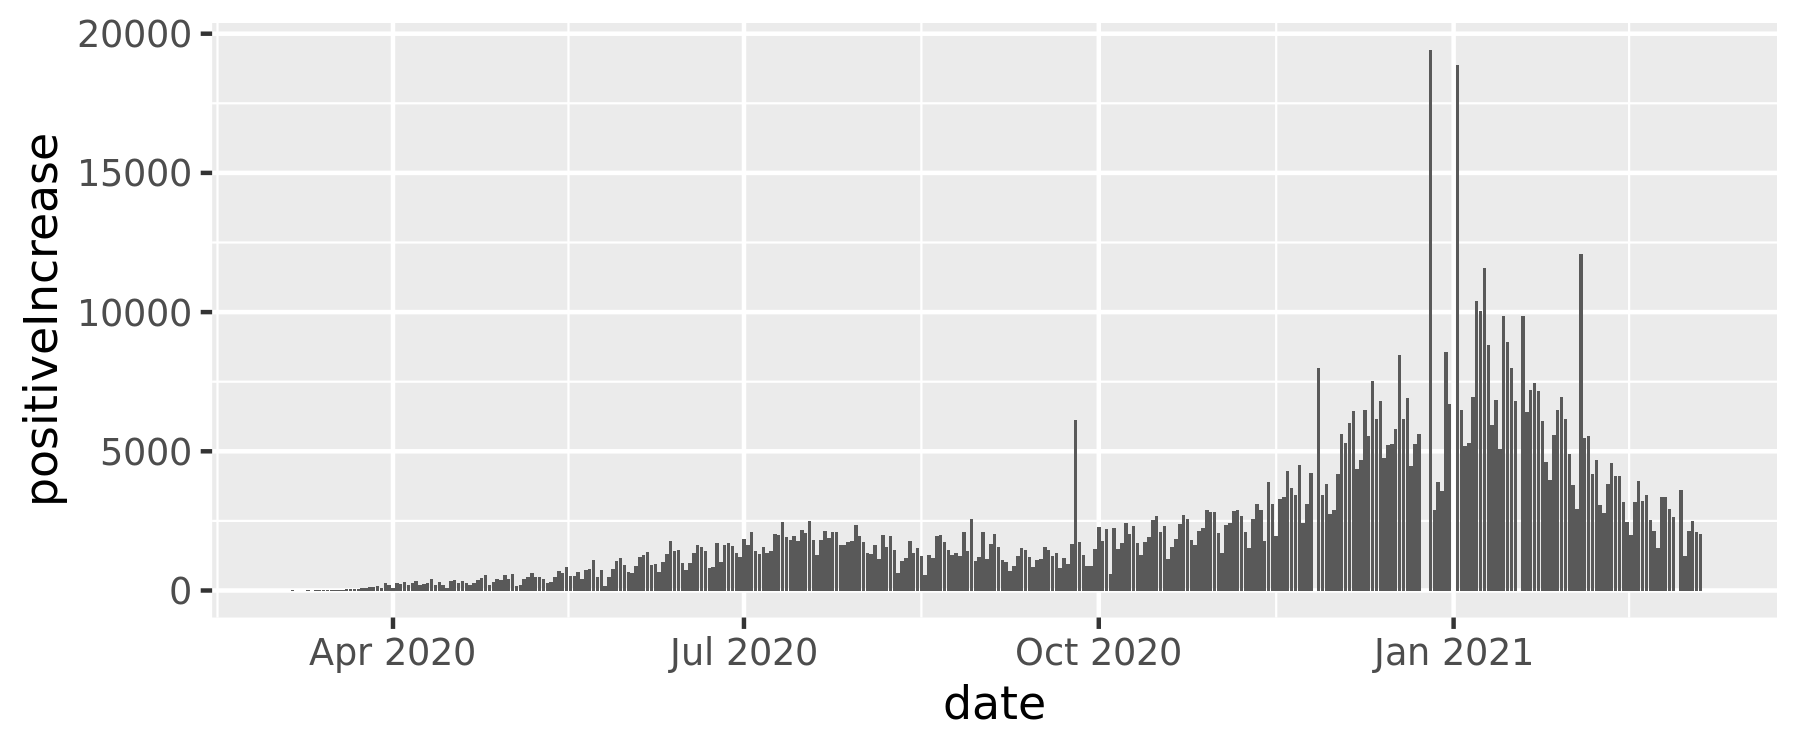

In [17]:
options(repr.plot.width=6, repr.plot.height=2.5, repr.plot.res = 300)

# write your chart code below 👇
p = ggplot(cases, aes(x=date, y=positiveIncrease)) + geom_bar(stat='identity')

p

## Bonus❗️

The cases dataset only has case counts for NC. How might you confirm this using `geom_bar`?

In [24]:
cases |> names()

[1] "date"                        "state"                      
 [3] "positive"                    "probableCases"              
 [5] "negative"                    "pending"                    
 [7] "totalTestResultsSource"      "totalTestResults"           
 [9] "hospitalizedCurrently"       "hospitalizedCumulative"     
[11] "inIcuCurrently"              "inIcuCumulative"            
[13] "onVentilatorCurrently"       "onVentilatorCumulative"     
[15] "recovered"                   "lastUpdateEt"               
[17] "dateModified"                "checkTimeEt"                
[19] "death"                       "hospitalized"               
[21] "hospitalizedDischarged"      "dateChecked"                
[23] "totalTestsViral"             "positiveTestsViral"         
[25] "negativeTestsViral"          "positiveCasesViral"         
[27] "deathConfirmed"              "deathProbable"              
[29] "totalTestEncountersViral"    "totalTestsPeopleViral"      
[31] "totalTestsAntibody"          "positiveTestsAntibody"      
[33] "negativeTestsAntibody"       "totalTestsPeopleAntibody"   
[35] "positiveTestsPeopleAntibody" "negativeTestsPeopleAntibody"
[37] "totalTestsPeopleAntigen"     "positiveTestsPeopleAntigen" 
[39] "totalTestsAntigen"           "positiveTestsAntigen"       
[41] "fips"                        "positiveIncrease"           
[43] "negativeIncrease"            "total"                      
[45] "totalTestResultsIncrease"    "posNeg"                     
[47] "dataQualityGrade"            "deathIncrease"              
[49] "hospitalizedIncrease"        "hash"                       
[51] "commercialScore"             "negativeRegularScore"       
[53] "negativeScore"               "positiveScore"              
[55] "score"                       "grade"

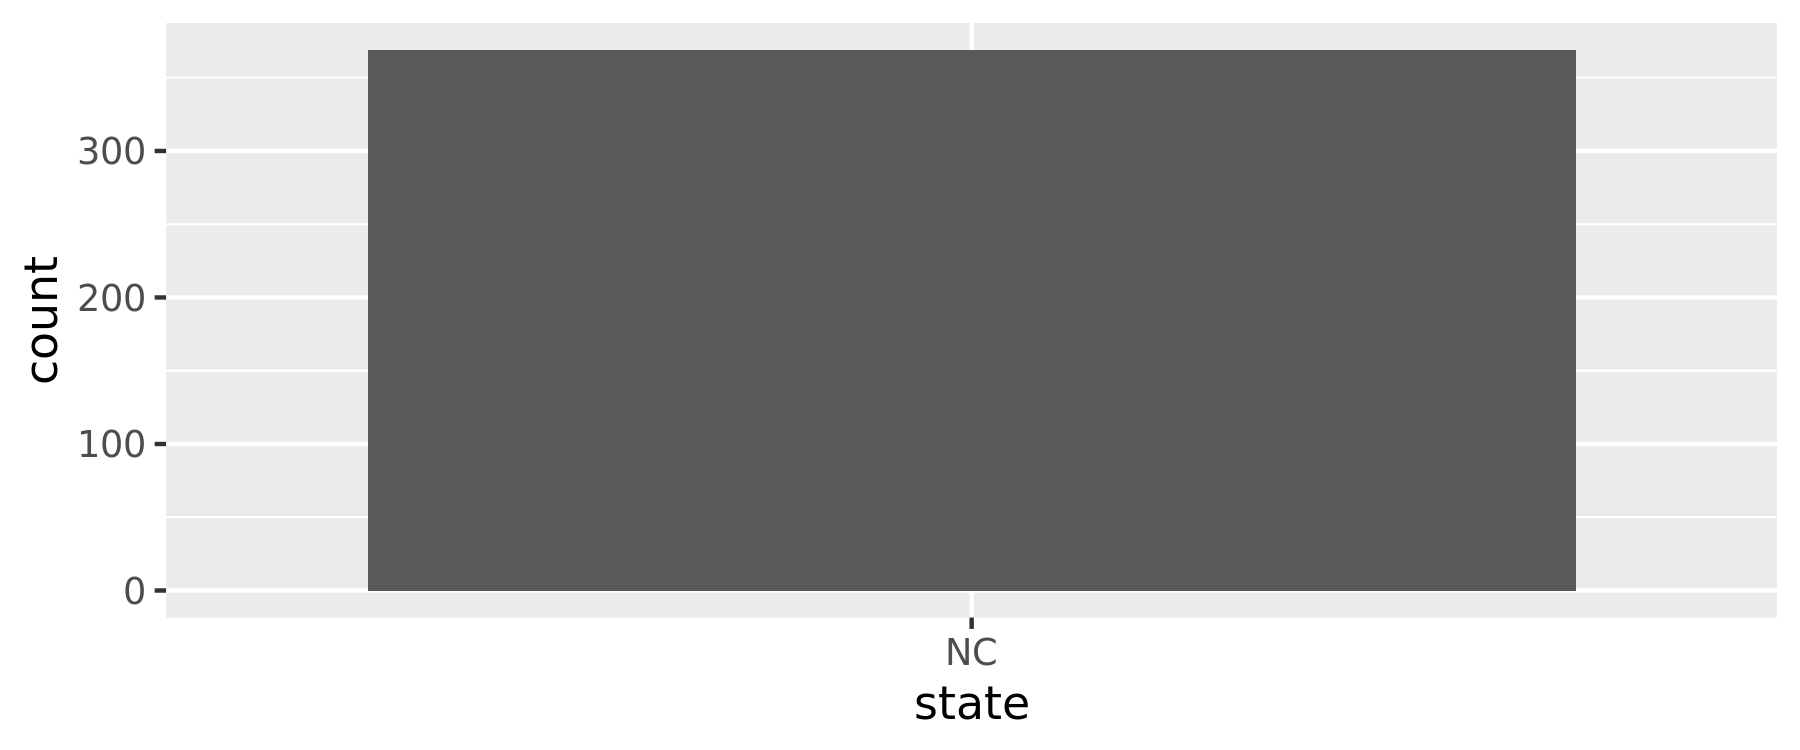

In [30]:
p = ggplot(cases, aes(x=state)) + geom_bar()

p